In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Read in data created from Data Retrieval

In [169]:
reddit_data_df = pd.read_csv('../datasets/subreddit_data_2023-10-18.csv')

In [170]:
reddit_data_df.shape

(3656, 9)

In [171]:
reddit_data_df.isnull().sum()

id                 0
type               0
title              0
self_text       2805
subreddit          0
upvote_ratio       0
link_address       0
user             151
datetime           0
dtype: int64

In [172]:
reddit_data_df['title'].str.len().mean()

97.4269693654267

In [173]:
reddit_data_df['title_length_chars'] = reddit_data_df['title'].str.len()

In [174]:
reddit_data_df['title_length_words'] = reddit_data_df['title'].str.split().apply(lambda x: len(x))

In [175]:
reddit_data_df['title_avg_word_length'] = reddit_data_df['title_length_chars'] / reddit_data_df['title_length_words']

<Figure size 800x800 with 0 Axes>

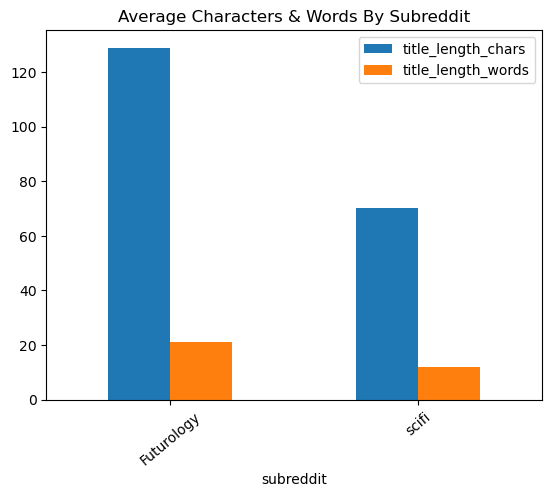

In [176]:
plt.figure(figsize=(8,8))
reddit_data_df.groupby('subreddit')[['title_length_chars', 'title_length_words']].agg('mean').plot.bar()
plt.xticks(rotation = 40)
plt.title('Average Characters & Words By Subreddit');

<Figure size 800x800 with 0 Axes>

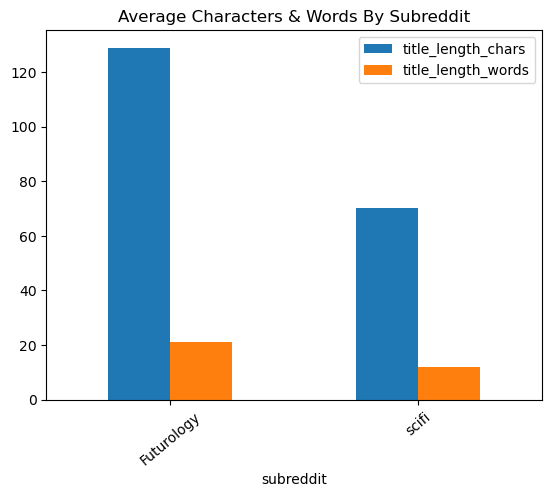

In [177]:
plt.figure(figsize=(8,8))
reddit_data_df.groupby('subreddit')[['title_length_chars', 'title_length_words']].agg('mean').plot.bar()
plt.xticks(rotation = 40)
plt.title('Average Characters & Words By Subreddit');

In [178]:
def URL_tokenize(url):
    text = url
    text = text.replace('https:', '')
    text = text.replace('http:','')
    text = text.replace('&amp', '&')
    text = text.replace('&nbsp', ' ')
    text = text.replace('?', ' ')
    text = text.replace('//', ' ')
    text = text.replace('/', ' ')
    text = text.replace('-', ' ')
    text = text.replace('_', ' ')
    text = text.split()
    text = ' '.join(text[1:])
    return text

In [179]:
def extract_domain(url):
    text = url
    text = text.replace('https:', '')
    text = text.replace('http:','')
    text = text.replace('www.', '')
    text = text.replace('/', ' ')
    return text.split()[0]

In [180]:
print(extract_domain('http://www.google.com/hello'))

google.com


In [181]:
print(URL_tokenize('http://www.google.com/hello-world/good&ampstuff'))

hello world good&stuff


In [182]:
reddit_data_df['url_content'] = reddit_data_df['link_address'].apply(lambda url: URL_tokenize(url))

In [183]:
reddit_data_df['url_domain'] = reddit_data_df['link_address'].apply(lambda url: extract_domain(url))

In [184]:
reddit_data_df['url_domain'].value_counts()

reddit.com             961
i.redd.it              350
youtu.be                97
theguardian.com         86
businessinsider.com     76
                      ... 
tellerreport.com         1
hks.harvard.edu          1
iflscience.com           1
itmunch.com              1
theoatmeal.com           1
Name: url_domain, Length: 670, dtype: int64

In [185]:
reddit_data_df['url_domain'].apply( lambda domain : True if (domain == 'reddit.com') or (domain == 'i.redd.it') else False)

0       False
1       False
2        True
3       False
4       False
        ...  
3651    False
3652    False
3653    False
3654     True
3655    False
Name: url_domain, Length: 3656, dtype: bool

In [186]:
reddit_data_df['url_domain'].replace(['reddit.com', 'i.redd.it'], ['NA', 'NA'], inplace = True)

In [187]:
reddit_data_df.loc[: , ['url_domain','url_content']]

,url_domain,url_content
0,ev-riders.com,riders.com news new rare mineral in china that...
1,archive.ph,qHvFy#selection 347.0 347.70
2,NA,r Futurology comments 15j3lad scott galloway p...
3,insider.com,future foods whats for breakfast 2023 07 utm s...
4,undp.org,press releases 25 countries halved multidimens...
...,...,...
3651,cinemablend.com,television 2488807 why hulu picked up seth mac...
3652,theoatmeal.com,comics plane
3653,theverge.com,2020 5 5 21248460 nasa tom cruise movie intern...
3654,NA,r scifi comments 1lf3oo ever wonder what picar...


In [188]:
reddit_data_df.loc[reddit_data_df['url_domain'] == 'NA'  , ['url_content']  ] = 'NA'

In [189]:
reddit_data_df.loc[: , ['url_domain','url_content']]

,url_domain,url_content
0,ev-riders.com,riders.com news new rare mineral in china that...
1,archive.ph,qHvFy#selection 347.0 347.70
2,NA,NA
3,insider.com,future foods whats for breakfast 2023 07 utm s...
4,undp.org,press releases 25 countries halved multidimens...
...,...,...
3651,cinemablend.com,television 2488807 why hulu picked up seth mac...
3652,theoatmeal.com,comics plane
3653,theverge.com,2020 5 5 21248460 nasa tom cruise movie intern...
3654,NA,NA


In [190]:
reddit_data_df['external_link'] = 0

In [191]:
reddit_data_df.loc[reddit_data_df['url_domain'] != 'NA'  , ['external_link']  ] = 1

In [192]:
reddit_data_df.head()

,id,type,title,self_text,subreddit,upvote_ratio,link_address,user,datetime,title_length_chars,title_length_words,title_avg_word_length,url_content,url_domain,external_link
0,17a5o3v,hot,New rare mineral in China that can revolutioni...,NaN,Futurology,0.71,https://ev-riders.com/news/new-rare-mineral-in...,1oneplus,2023-10-17 14:54:09,79,12,6.583333,riders.com news new rare mineral in china that...,ev-riders.com,1
1,179zrx9,hot,How ‘A.I. Agents’ That Roam the Internet Could...,NaN,Futurology,0.80,https://archive.ph/qHvFy#selection-347.0-347.70,SharpCartographer831,2023-10-17 10:34:19,70,12,5.833333,qHvFy#selection 347.0 347.70,archive.ph,1
2,15j3lad,hot,Scott Galloway predictions for the future of t...,I found this recent YouTube presentation by NY...,Futurology,0.77,https://www.reddit.com/r/Futurology/comments/1...,Maui96793,2023-08-05 14:56:57,82,14,5.857143,NA,NA,0
3,15iyaft,hot,Future foods: What's for breakfast in 2050?,NaN,Futurology,0.84,https://www.insider.com/future-foods-whats-for...,thisisinsider,2023-08-05 11:16:41,43,7,6.142857,future foods whats for breakfast 2023 07 utm s...,insider.com,1
4,15i0f10,hot,"New research shows that in 15 years, India has...",NaN,Futurology,0.87,https://www.undp.org/press-releases/25-countri...,lughnasadh,2023-08-04 09:41:18,220,38,5.789474,press releases 25 countries halved multidimens...,undp.org,1


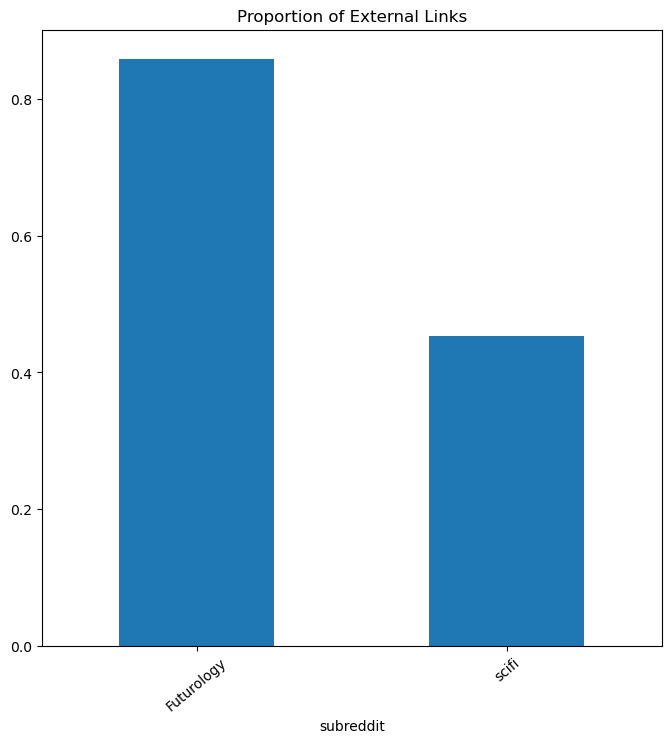

In [193]:
plt.figure(figsize=(8,8))
plt.title('Proportion of External Links')

reddit_data_df.groupby('subreddit')['external_link'].mean().plot.bar()
plt.xticks(rotation = 40);

<Figure size 1000x1000 with 0 Axes>

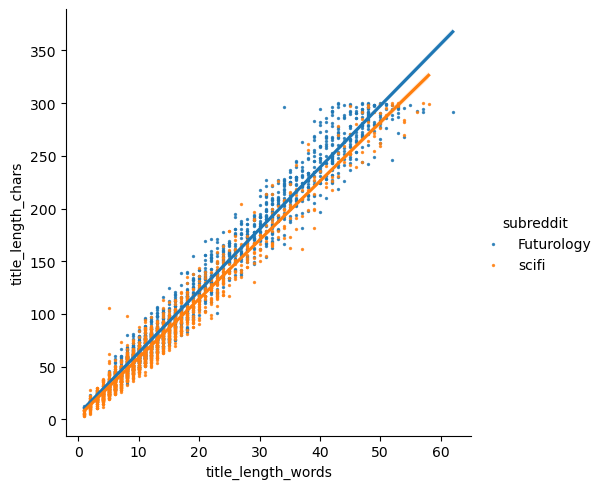

In [194]:
plt.figure(figsize=(10,10))
sns.lmplot(x = 'title_length_words', y = 'title_length_chars', data = reddit_data_df, hue = 'subreddit', scatter_kws={'s' : 2})

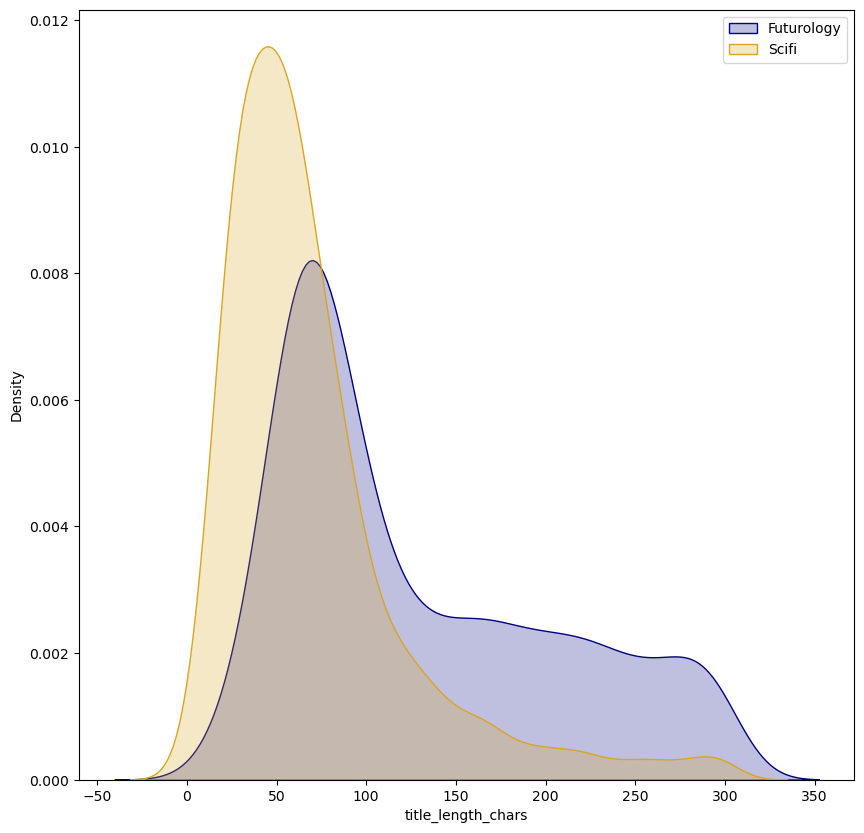

In [195]:
plt.figure(figsize=(10,10))
sns.kdeplot(reddit_data_df.loc[ reddit_data_df['subreddit'] == 'Futurology', 'title_length_chars'], fill = True, color = 'navy')
sns.kdeplot(reddit_data_df.loc[ reddit_data_df['subreddit'] == 'scifi', 'title_length_chars'], fill = True, color = 'goldenrod')
plt.legend(['Futurology', 'Scifi'])

In [199]:
# reddit_data_df.to_csv('../datasets/reddit_data_engineered.csv', index = False)